# Machine Learning for Level Truncation in Open String Field Theory

Harold Erbin, Riccardo Finotello, Matej Kudrna, Martin Schnabl

---
---

## Abstract

In the framework of bosonic Open String Field Theory (OSFT), we consider several observables characterised by conformal weight and type, and the position of vacua in the potential for various values of truncated mass level. We focus on the prediction of the extrapolated value for the level-$\infty$ truncation using Machine Learning (ML) techniques.

In this notebook we perform the exploratory data analysis (EDA) necessary for the analysis.

In [1]:
%load_ext autoreload
%autoreload 2

## Load the Dataset

We load the tidy dataset and prepare for the EDA by dropping duplicates and looking at its properties:

In [2]:
import pandas as pd

# load the dataset
df = pd.read_csv('./data/sft-trunc_tidy.csv')
df.describe()

,solutions,init,weight,type,exp,level_2,level_3,level_4,level_5,level_6,...,level_9,level_10,level_11,level_12,level_13,level_14,level_15,level_16,level_17,level_18
count,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,...,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,7.780000e+02
mean,23.769923,0.895644,1.866132,3.763496,0.565553,-1.445088,-1.601521,7.439769,7.868296,-31.804348,...,165.710481,-694.199289,-716.565188,2825.198875,2905.033974,-10670.682688,-10940.899718,37496.086827,38361.085396,-1.231898e+05
std,13.323121,1.010897,2.316228,0.646228,0.694858,4.426993,4.866653,20.794126,22.007813,107.085685,...,613.207676,2747.170627,2834.028022,11472.483011,11788.547209,43713.145780,44792.119271,154164.769805,157641.861843,5.083035e+05
min,0.000000,0.000000,0.000000,2.000000,-1.000000,-19.744040,-21.893983,-0.754568,-0.782633,-514.984097,...,-1.781985,-13321.170445,-13781.246472,-8.850113,-12.265769,-211473.396816,-216475.644423,-44.356923,-66.596211,-2.489024e+06
25%,12.000000,0.000000,0.040412,4.000000,0.000000,-0.645363,-0.949806,0.000000,0.000000,-0.887184,...,0.000040,-0.979714,-1.014127,0.001875,0.001949,-1.686900,-3.846872,0.126356,0.116350,-5.677069e+00
50%,24.500000,0.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.939715,0.947606,0.000235,...,0.980124,0.002672,0.011387,1.000000,0.999573,0.700873,0.595807,1.005173,1.003977,9.075807e-01
75%,35.000000,1.750000,2.990578,4.000000,1.000000,0.931752,0.997118,1.323336,1.463312,0.993624,...,1.549167,1.000000,1.003657,3.134092,4.955153,1.004671,1.006135,6.450788,9.882119,1.005114e+00
max,45.000000,3.000000,9.000000,4.000000,1.000000,1.239384,1.358098,122.931347,131.675490,2.275741,...,2890.129013,5.243298,6.283092,56115.100219,57592.698860,16.106978,23.077325,731718.332090,748286.961169,1.033588e+02


We then remove the duplicated entries (they should present the same entries across all the columns):

In [3]:
duplicates = df.duplicated()

# drop the duplicates
df = df.loc[~duplicates]

# save the new dataset (first order it for future comparisons)
df.to_csv('./data/sft-trunc_eda.csv', index=False)

# compute the fraction of duplicates
print('Fraction of duplicated entries: {:.2f}%'.format(100 * duplicates.mean()))
print('Number of duplicates:           {:d}'.format(duplicates.sum()))

Fraction of duplicated entries: 5.91%
Number of duplicates:           46


The new dataset has therefore a smaller number of entries and different properties:

In [4]:
df.describe()

,solutions,init,weight,type,exp,level_2,level_3,level_4,level_5,level_6,...,level_9,level_10,level_11,level_12,level_13,level_14,level_15,level_16,level_17,level_18
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,...,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,7.320000e+02
mean,23.849727,0.832923,1.983402,3.748634,0.538251,-1.605744,-1.770120,7.840907,8.296700,-33.868139,...,176.059381,-737.888108,-761.659480,3002.674618,3087.526701,-11341.308600,-11628.506465,39852.334515,40771.690931,-1.309313e+05
std,13.322038,0.997060,2.338717,0.663437,0.707522,4.515971,4.969205,21.374749,22.621096,110.076428,...,630.770974,2826.575772,2915.937396,11805.371641,12130.574351,44982.958696,46093.166999,158645.302316,162223.144544,5.230833e+05
min,0.000000,0.000000,0.000000,2.000000,-1.000000,-19.744040,-21.893983,-0.754568,-0.782633,-514.984097,...,-1.781985,-13321.170445,-13781.246472,-8.850113,-12.265769,-211473.396816,-216475.644423,-44.356923,-66.596211,-2.489024e+06
25%,12.750000,0.000000,0.158447,4.000000,0.000000,-0.776018,-1.031007,0.000000,0.000000,-0.919728,...,0.000000,-1.106747,-1.780883,0.001452,0.001633,-2.764240,-5.863000,0.041082,0.040815,-1.850164e+01
50%,25.000000,0.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.924598,0.935917,0.000000,...,0.975852,0.001638,0.001847,0.987451,0.987109,0.001680,0.018444,1.001152,1.000000,1.859456e-01
75%,35.250000,1.650000,3.226174,4.000000,1.000000,0.817407,0.917998,1.387335,1.524975,0.965868,...,2.129576,0.993199,0.998879,4.057912,6.077472,0.999664,1.000738,14.953725,13.923463,1.000880e+00
max,45.000000,3.000000,9.000000,4.000000,1.000000,1.239384,1.358098,122.931347,131.675490,2.275741,...,2890.129013,5.243298,6.283092,56115.100219,57592.698860,16.106978,23.077325,731718.332090,748286.961169,1.033588e+02


In [5]:
print('No. of rows:    {:d}'.format(df.shape[0]))
print('No. of columns: {:d}'.format(df.shape[1]))

No. of rows:    732
No. of columns: 22


## Exploratory Data Analysis

In the previous section we loaded and prepared the dataset for the analysis. In this section we focus on Exploratory Data Analysis (EDA), revealing outliers and underlying distribution, and the preprocessing of the data.

As we saw in the tables summarising the variability of the features and the labels, the dataset may contain a certain number of outlying observations. In fact we want to quantify the population of outliers by computing the interquartile range of each feature (only those necessary for the analysis: we can drop `solutions` and `init` which are disposable, intermediate properties of the solutions). We compute the fraction of outliers for each column:

In [6]:
import pandas as pd
import numpy  as np

def quartile(series: pd.Series) -> pd.Series:
    '''
    Return the logical array of samples outside the interquartile range.
    
    Required arguments:
        series: the Pandas series to consider.
        
    Returns:
        the logical array of outliers
    '''
    # compute the 25th and 75th percentile
    q1, q3 = series.quantile([0.25, 0.75])
    iqr    = q3 - q1
    
    # compute the lower and upper bounds of the interval
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    return (series < lower) | (series > upper)

# apply to dataset
df_quart = df.drop(columns=['solutions', 'init', 'exp'])
df_quart = df_quart.apply(quartile, axis=0)
df_quart = df_quart.apply(lambda x: round(np.mean(x), 2), axis=0)
df_quart

weight      0.06
type        0.13
level_2     0.17
level_3     0.17
level_4     0.19
level_5     0.19
level_6     0.19
level_7     0.19
level_8     0.20
level_9     0.19
level_10    0.22
level_11    0.21
level_12    0.20
level_13    0.19
level_14    0.29
level_15    0.27
level_16    0.21
level_17    0.25
level_18    0.27
dtype: float64

This can also be visualised in plots of the features: we build the histograms of the digitized distribution of the values. In other words, we first construct reasonable bins of the data in each column and then plot the distributions counting the number of entries inside each interval designated by the bins of the histograms (N.B.: they are left-inclusive intervals, namely between two labels $a$ and $b$ we count the number of occurrencies in the interval $[a,b)$).

In [7]:
INPUT  = './data/sft-trunc_eda.csv'
OUTPUT = 'distrib_full'

!python3 ./scripts/df-distrib.py --input {INPUT} --output {OUTPUT} --rows 5 --columns 4

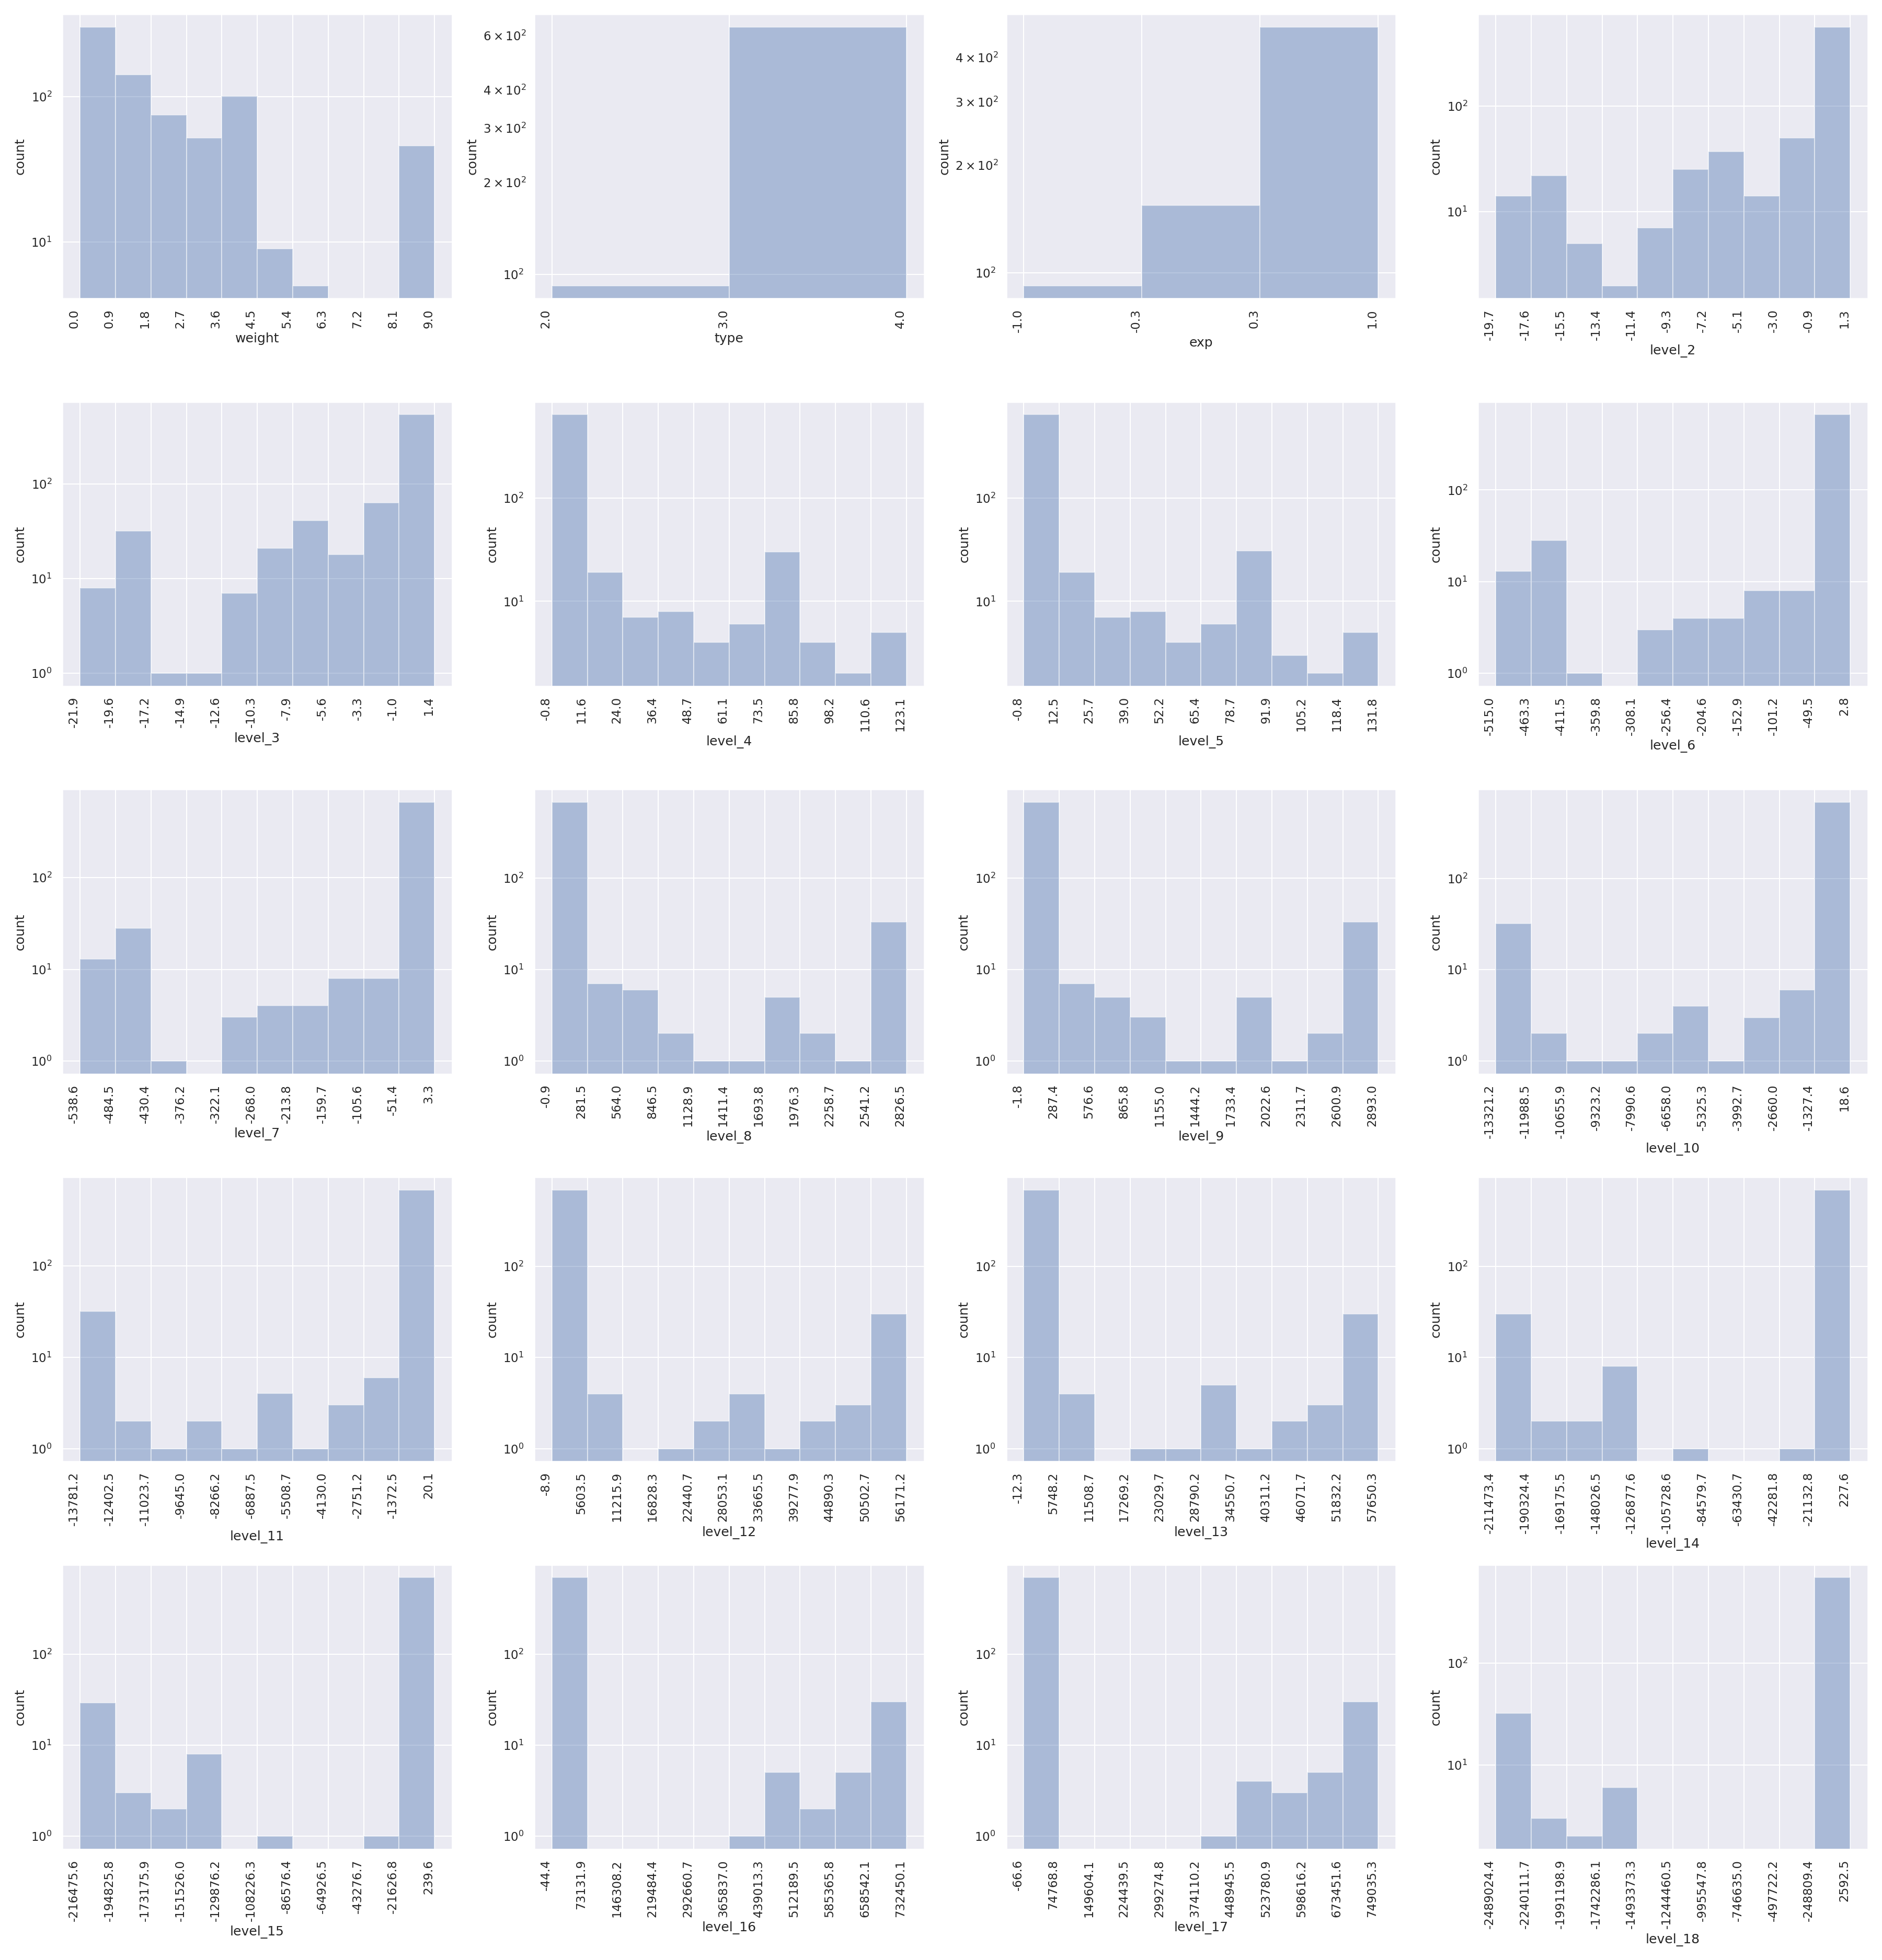

In [8]:
from IPython.display import Image
Image('./img/{}.png'.format(OUTPUT), width=480)

The same plot can be produced considering the distribution of the features according to the different orders of magnitudes to better understand the distribution of the variables:

In [9]:
INPUT  = './data/sft-trunc_eda.csv'
OUTPUT = 'counts_full'

!python3 ./scripts/df-counts.py --input {INPUT} --output {OUTPUT} --rows 5 --columns 4

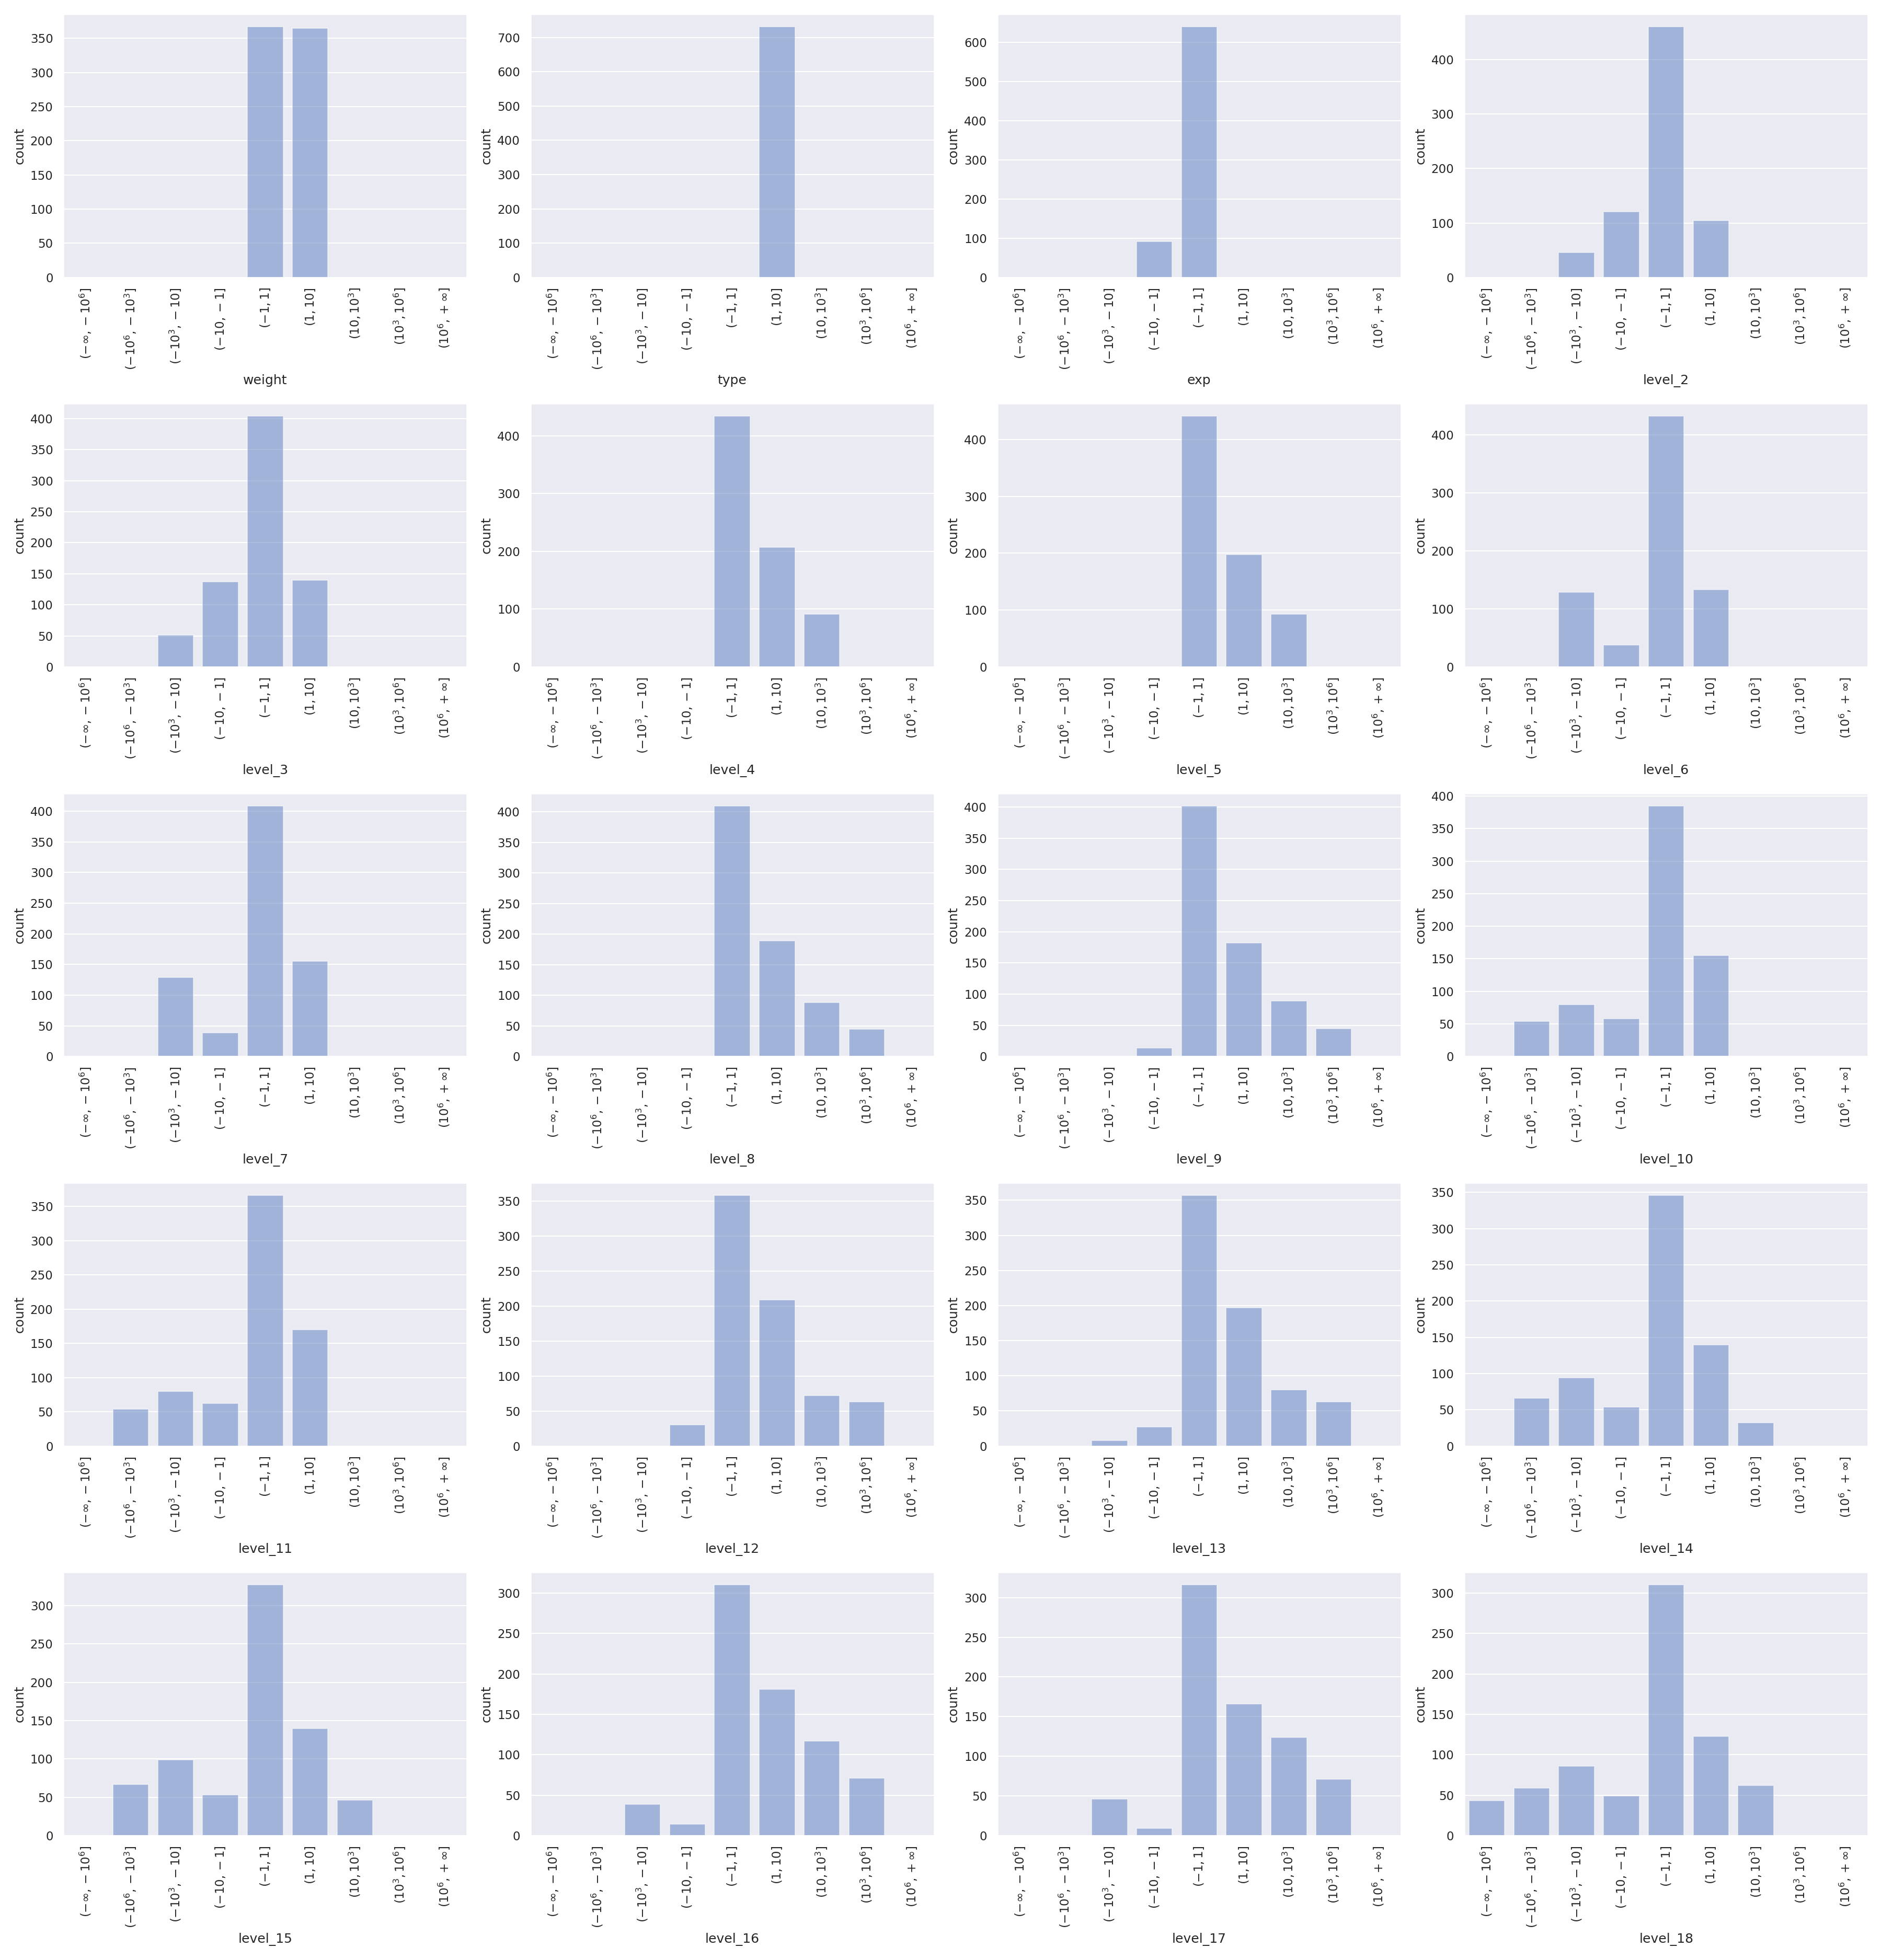

In [10]:
from IPython.display import Image
Image('./img/{}.png'.format(OUTPUT), width=480)

As we can see, the distributions are not ideally of the same order, but they have a decent amount of outlying samples outside the expected interval. In fact this seems to be a problem when `weight` is larger than $1.5$. We can in fact try to apply the same procedure in the case of low `weight` and high `weight` values.

### Unbalanced Weight Analysis

In [11]:
# divide the dataset into low and high weight
df_low = df.loc[df['weight'] < 1.5]
df_low.to_csv('./data/sft-trunc_eda_low.csv', index=False)
df_high = df.loc[df['weight'] >= 1.5]
df_high.to_csv('./data/sft-trunc_eda_high.csv', index=False)

assert df_low.shape[0] + df_high.shape[0] == df.shape[0]

Consider for example the case with `weight` $<1.5$ and plot the distribution of the variables:

In [12]:
INPUT  = './data/sft-trunc_eda_low.csv'
OUTPUT = 'distrib_low'

!python3 ./scripts/df-distrib.py --input {INPUT} --output {OUTPUT} --rows 5 --columns 4

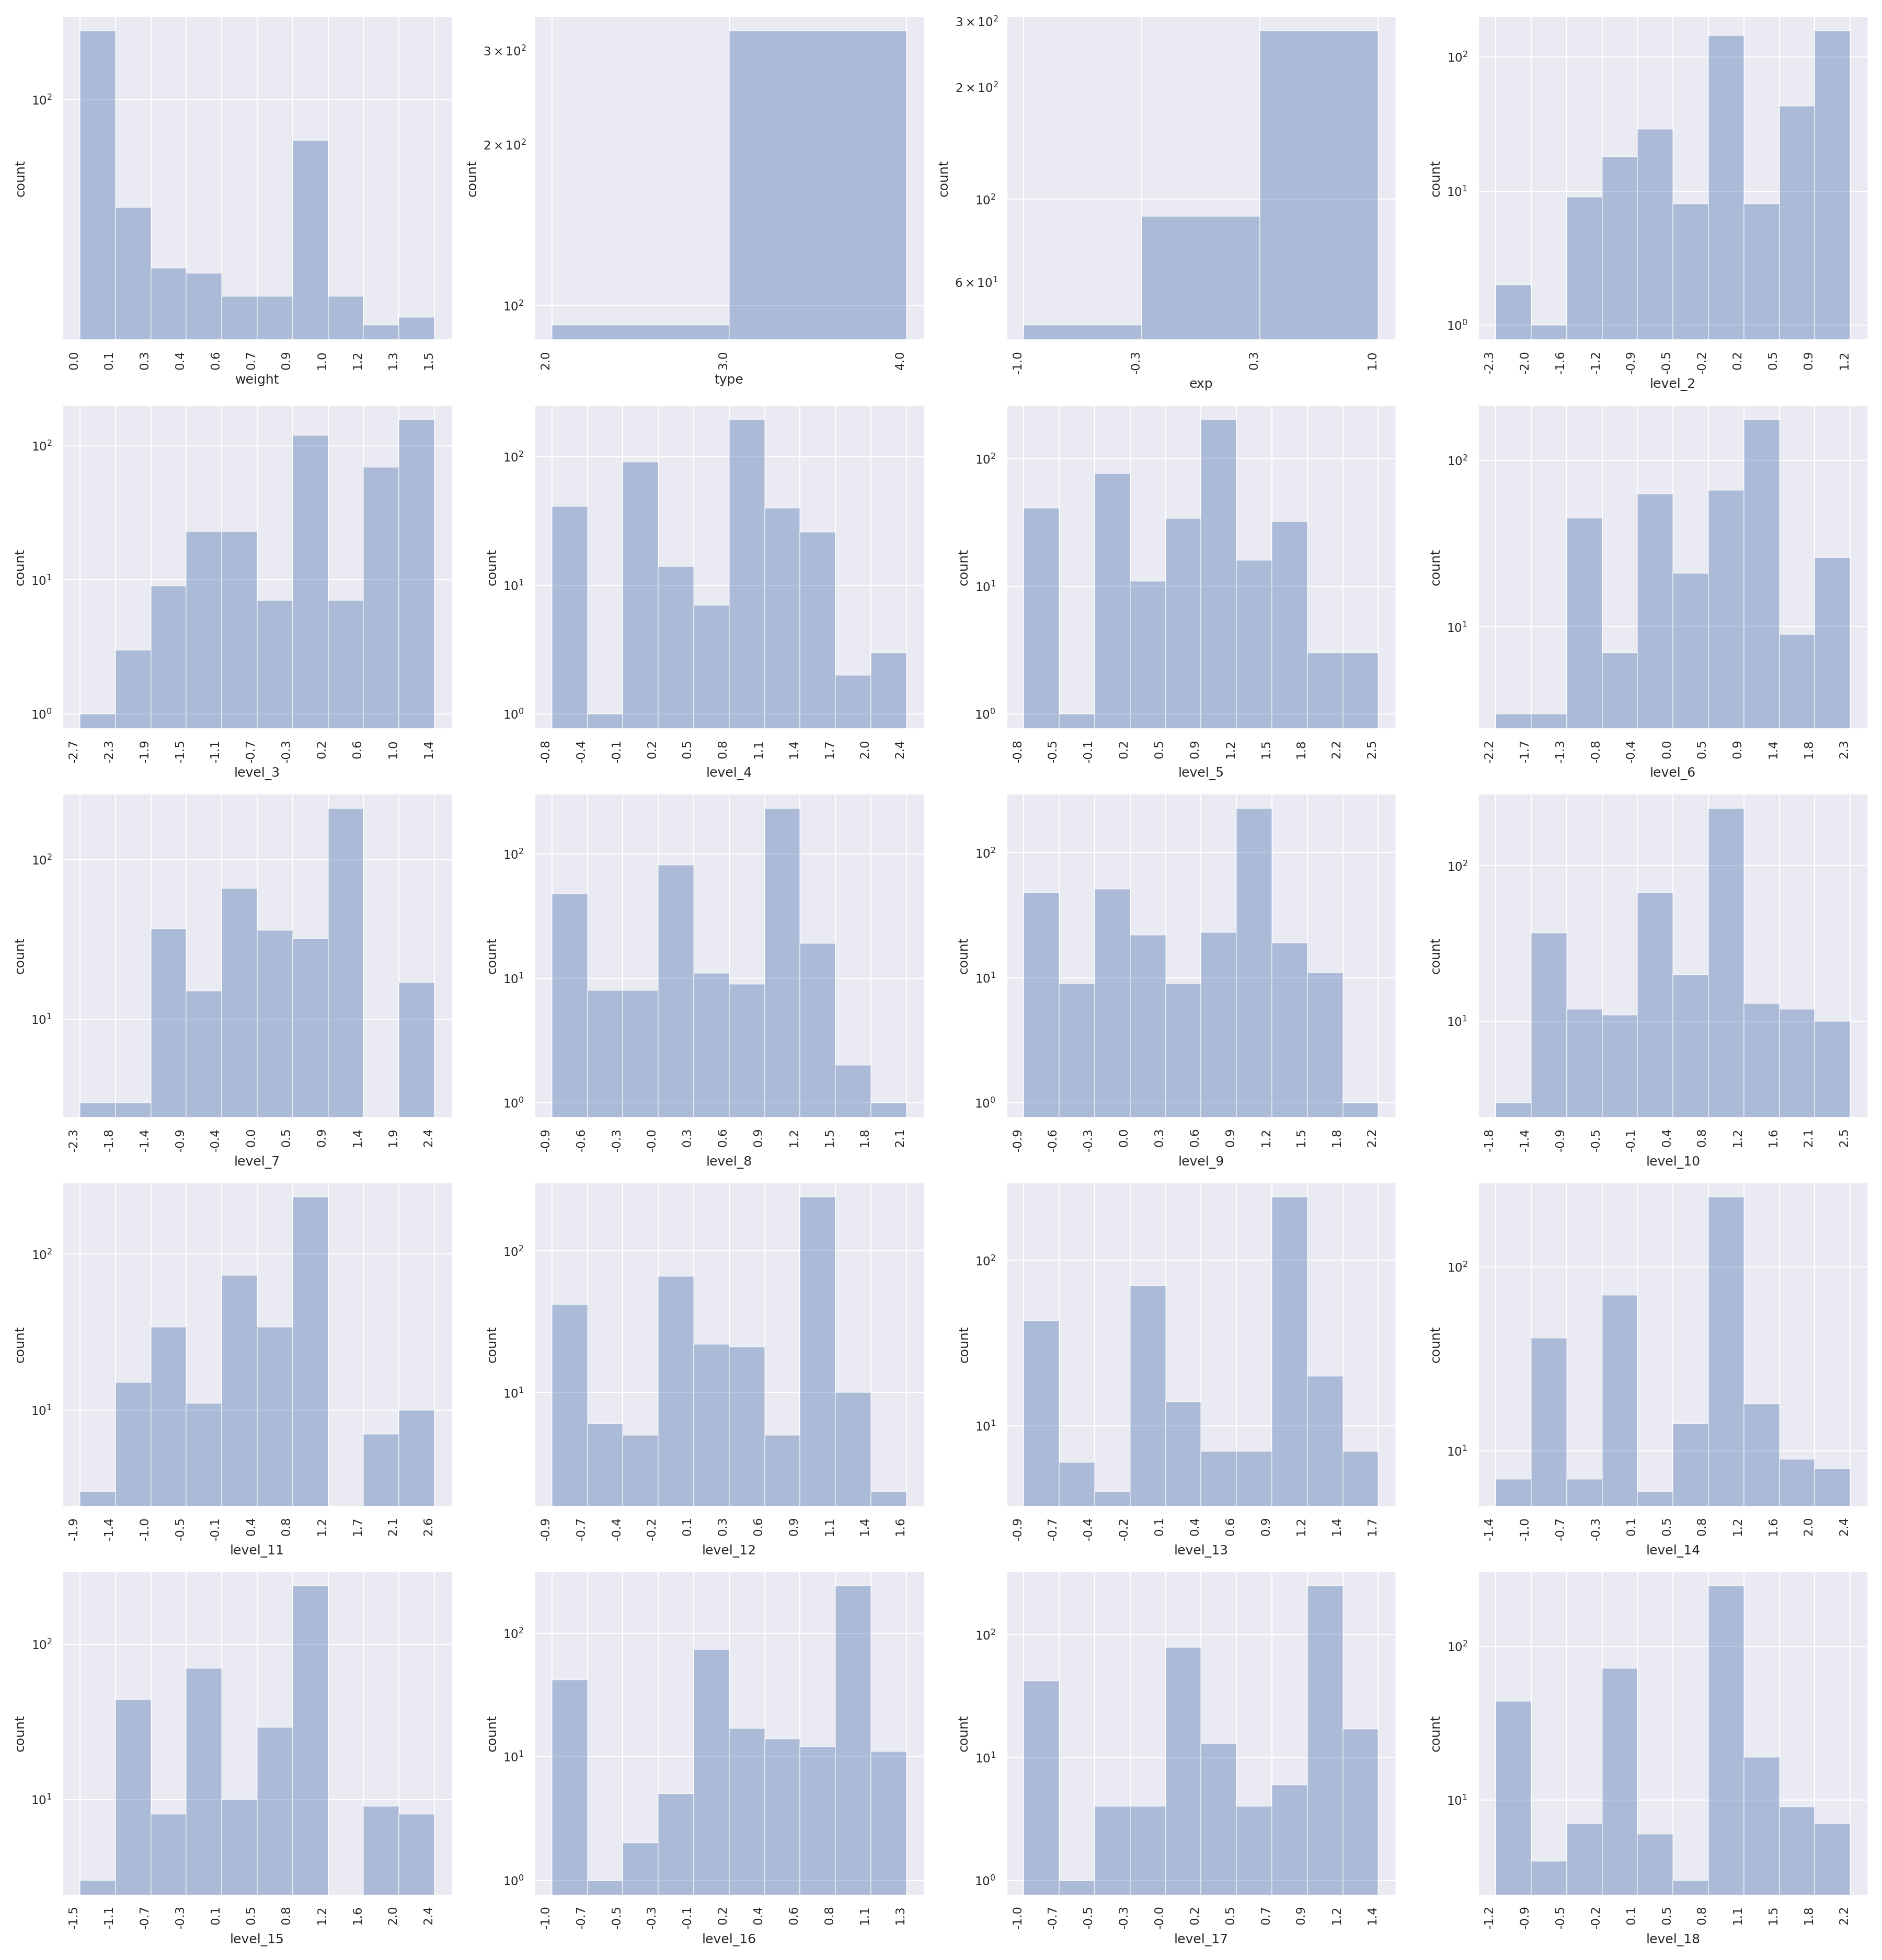

In [13]:
from IPython.display import Image
Image('./img/{}.png'.format(OUTPUT), width=480)

In [14]:
INPUT  = './data/sft-trunc_eda_low.csv'
OUTPUT = 'counts_low'

!python3 ./scripts/df-counts.py --input {INPUT} --output {OUTPUT} --rows 5 --columns 4

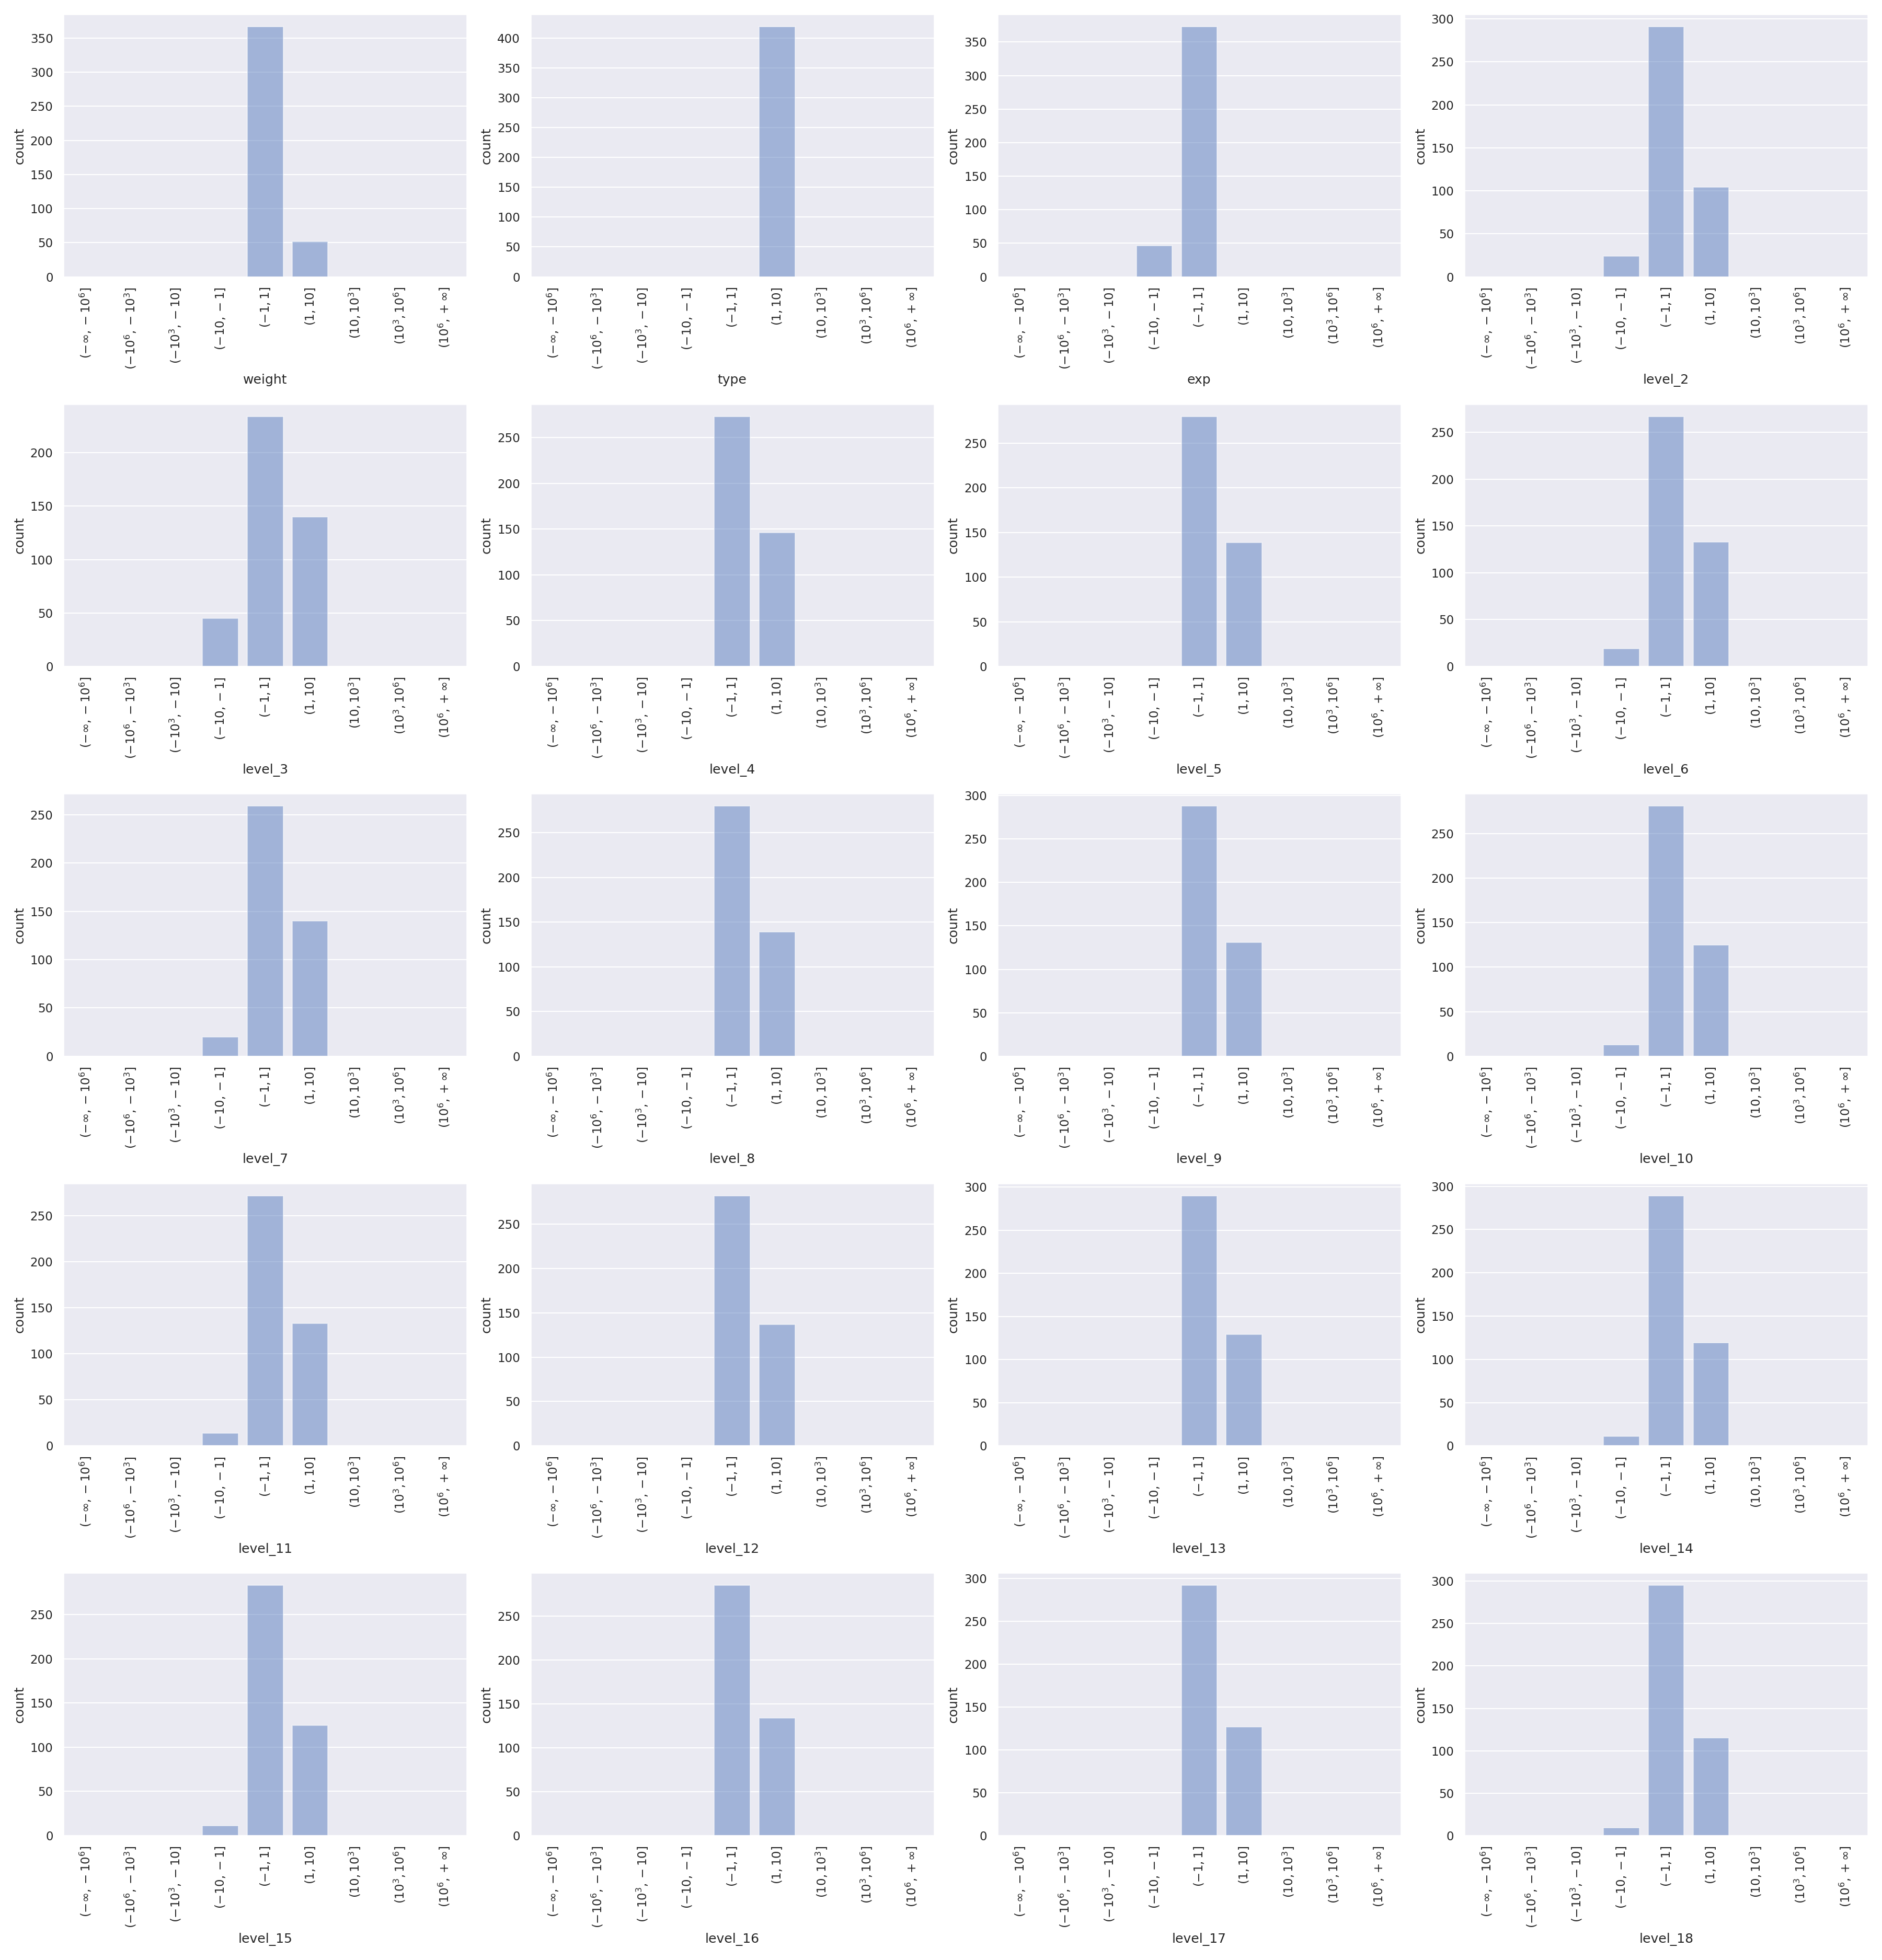

In [15]:
from IPython.display import Image
Image('./img/{}.png'.format(OUTPUT), width=480)

As we can see in this case the variables are in general $\mathcal{O}(1)$ and their variability is well distributed as we can also appreciate by computing the sample variance:

In [16]:
df_low.drop(columns=['solutions', 'init']).apply([np.mean, np.var])

,weight,type,exp,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,level_10,level_11,level_12,level_13,level_14,level_15,level_16,level_17,level_18
mean,0.449124,3.560859,0.565632,0.342041,0.387235,0.644366,0.692398,0.580711,0.521181,0.555206,0.608225,0.604896,0.562090,0.551380,0.587494,0.603835,0.574199,0.555074,0.580554,0.600160
var,0.220571,0.687077,0.466376,0.531674,0.677236,0.432960,0.457166,0.676901,0.649696,0.457595,0.486475,0.622289,0.596503,0.431977,0.457045,0.565548,0.546521,0.419898,0.439103,0.529019


We can also try to visualise the boxplot of the variables since their distribution is more restricted:

In [17]:
INPUT  = './data/sft-trunc_eda_low.csv'
OUTPUT = 'boxplot_low'

!python3 ./scripts/df-boxplot.py --input {INPUT} --output {OUTPUT}

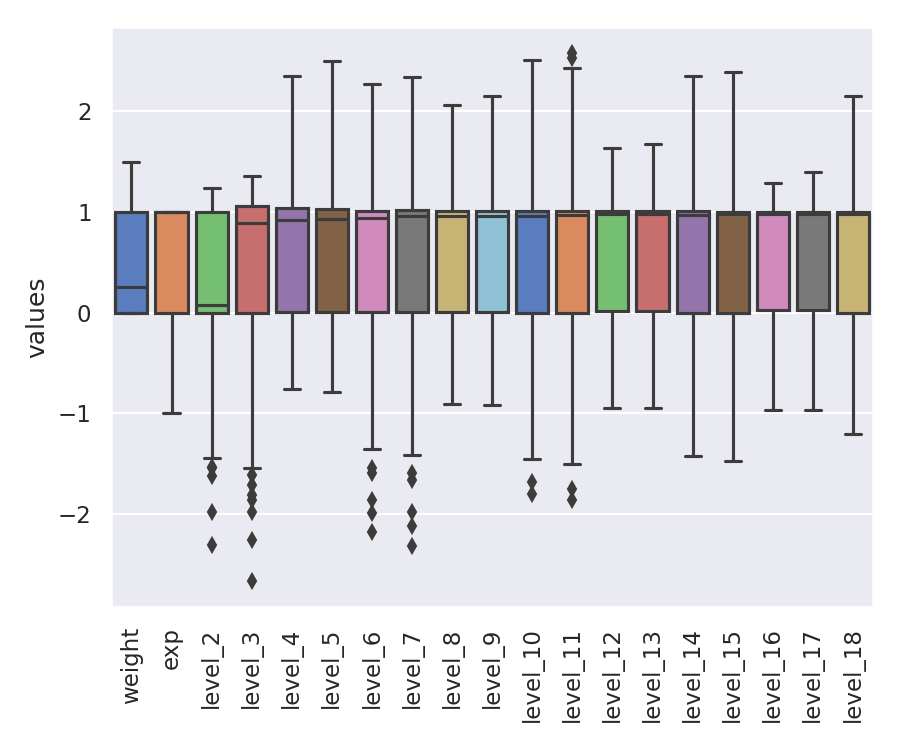

In [18]:
from IPython.display import Image
Image('./img/{}.png'.format(OUTPUT), width=480)

As we can see, all numerical variables (`type` is categorical and has been excluded from the plot) are all $\mathcal{O}(1)$, the interquartile ranges (the continuous vertical lines) are comparable, the medians (the short continuous horizontal lines) roughly lie in the same range and the number of outliers (isolated points) is restricted.

We can the do the same kind of analysis for `weight` $> 1.5$ and plot the distribution of the variables:

In [19]:
INPUT  = './data/sft-trunc_eda_high.csv'
OUTPUT = 'distrib_high'

!python3 ./scripts/df-distrib.py --input {INPUT} --output {OUTPUT} --rows 5 --columns 4

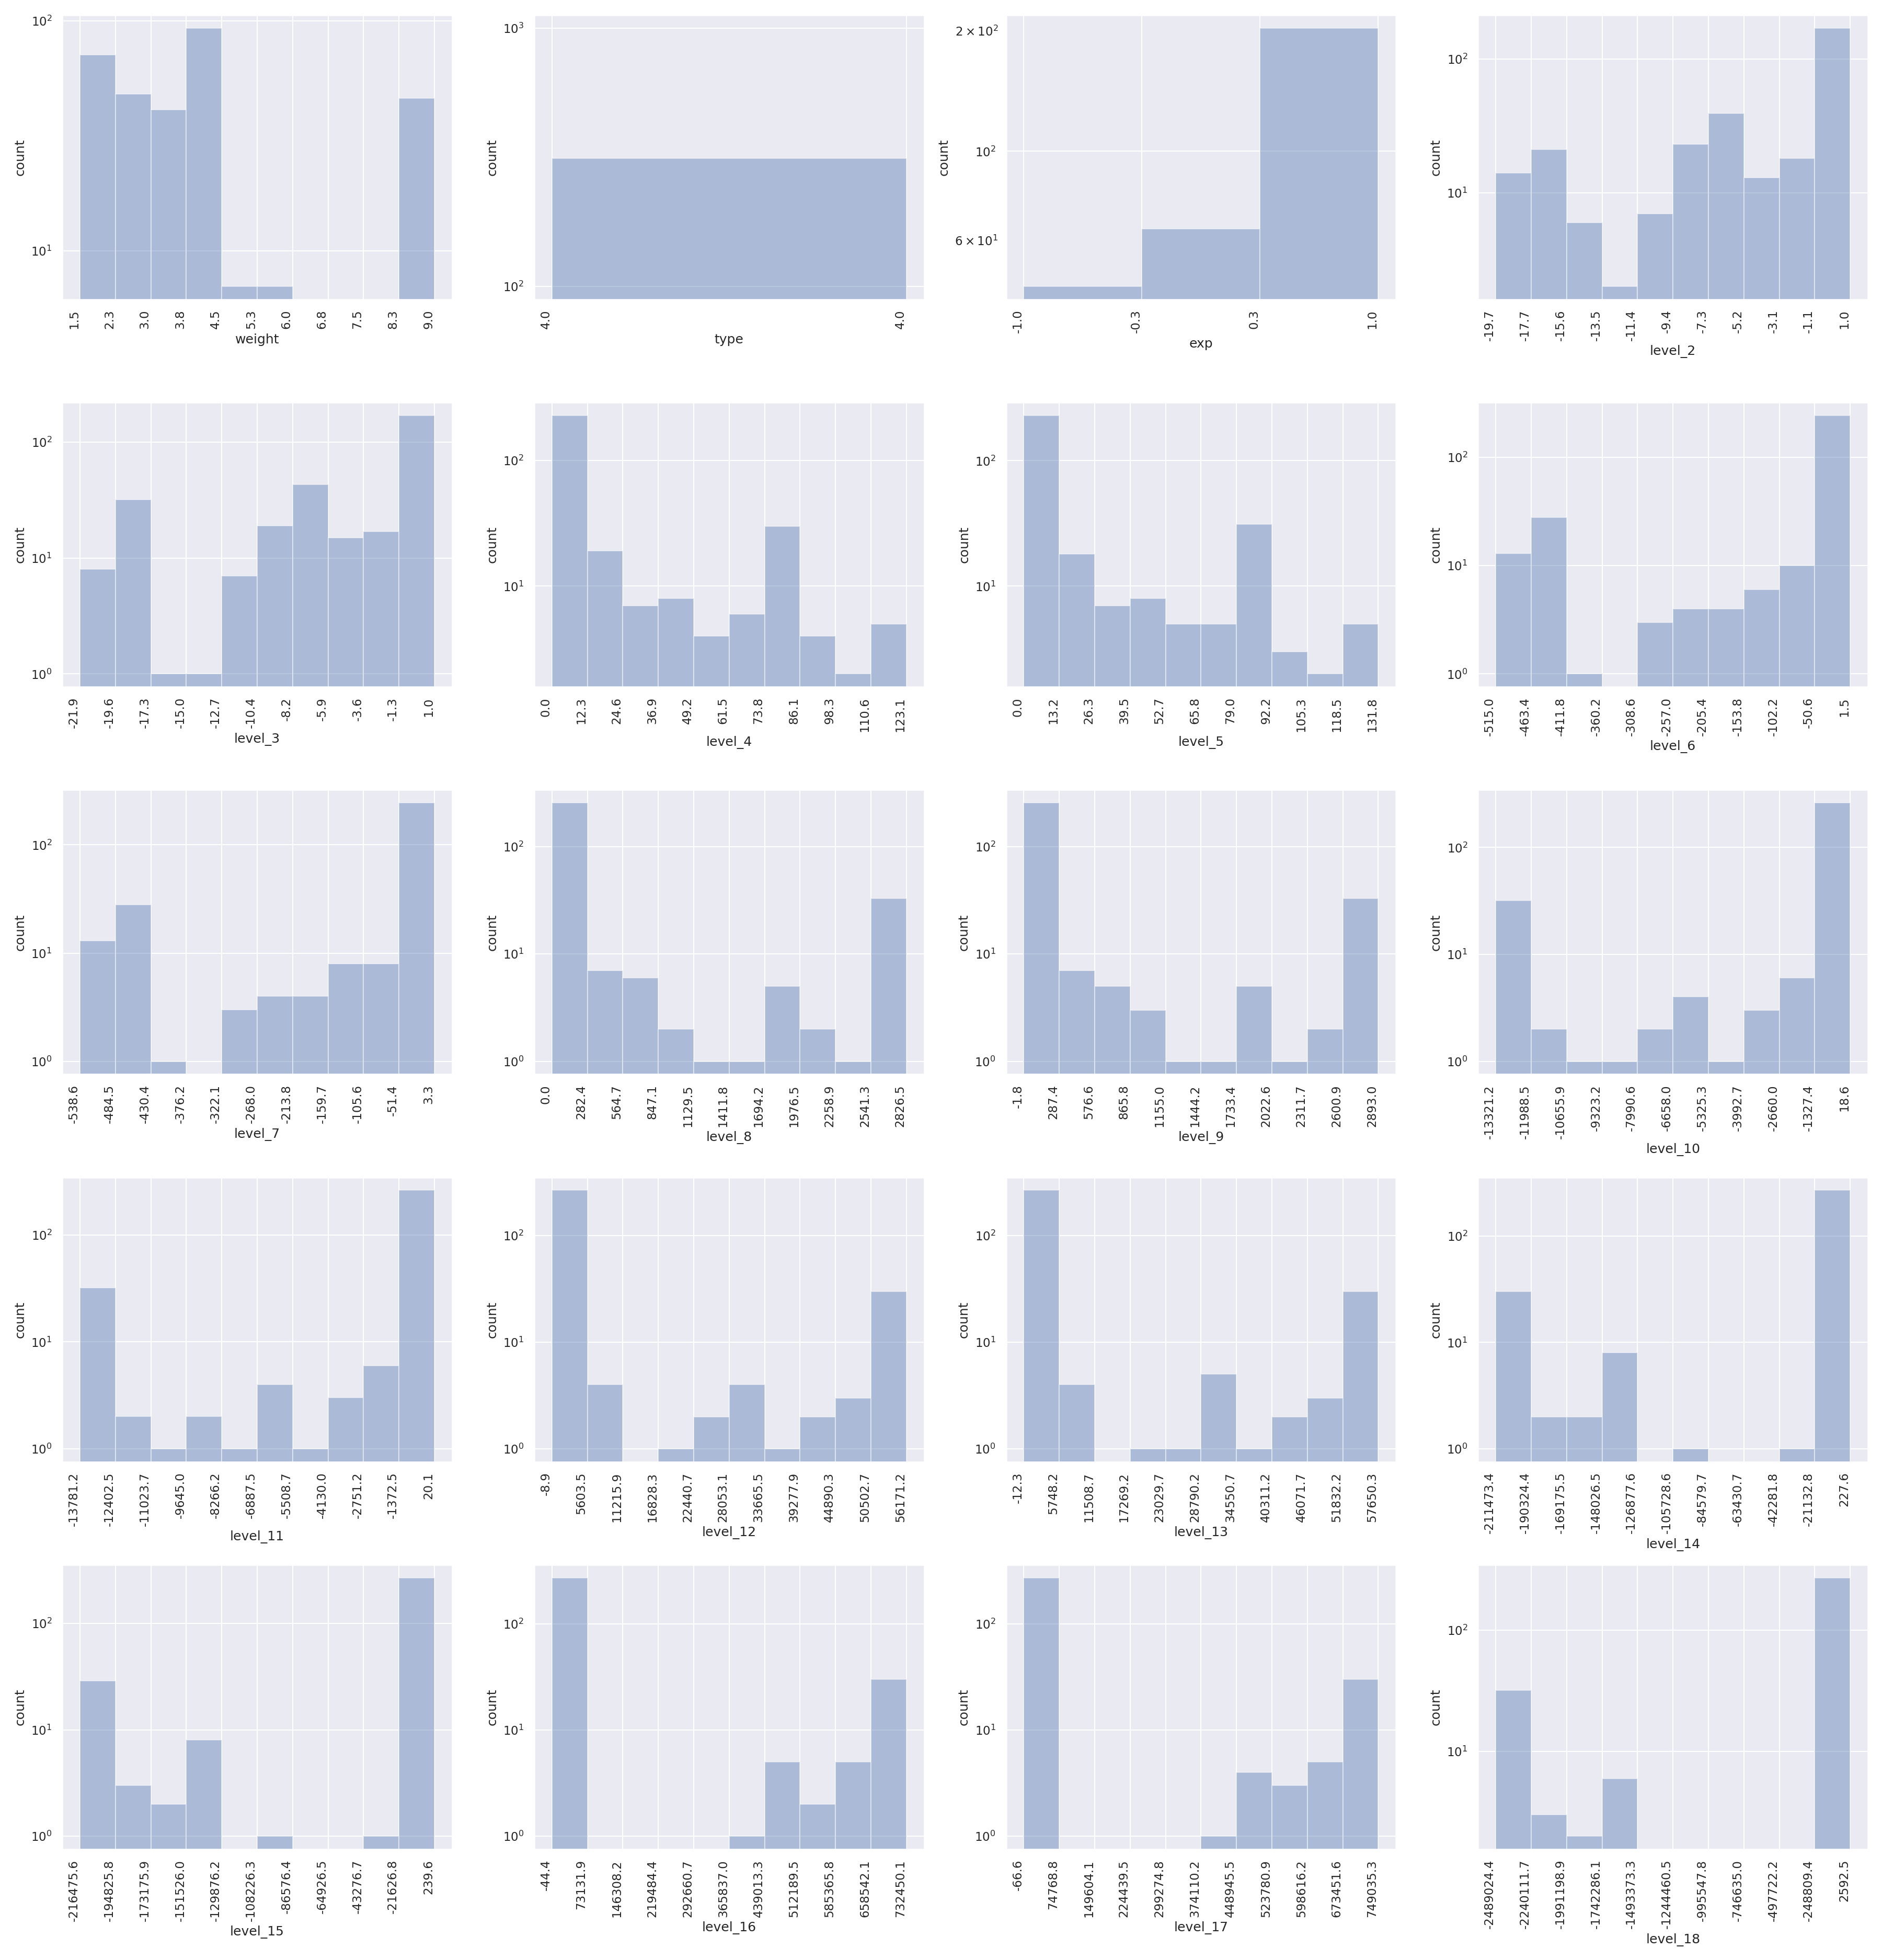

In [20]:
from IPython.display import Image
Image('./img/{}.png'.format(OUTPUT), width=480)

In [21]:
INPUT  = './data/sft-trunc_eda_high.csv'
OUTPUT = 'counts_high'

!python3 ./scripts/df-counts.py --input {INPUT} --output {OUTPUT} --rows 5 --columns 4

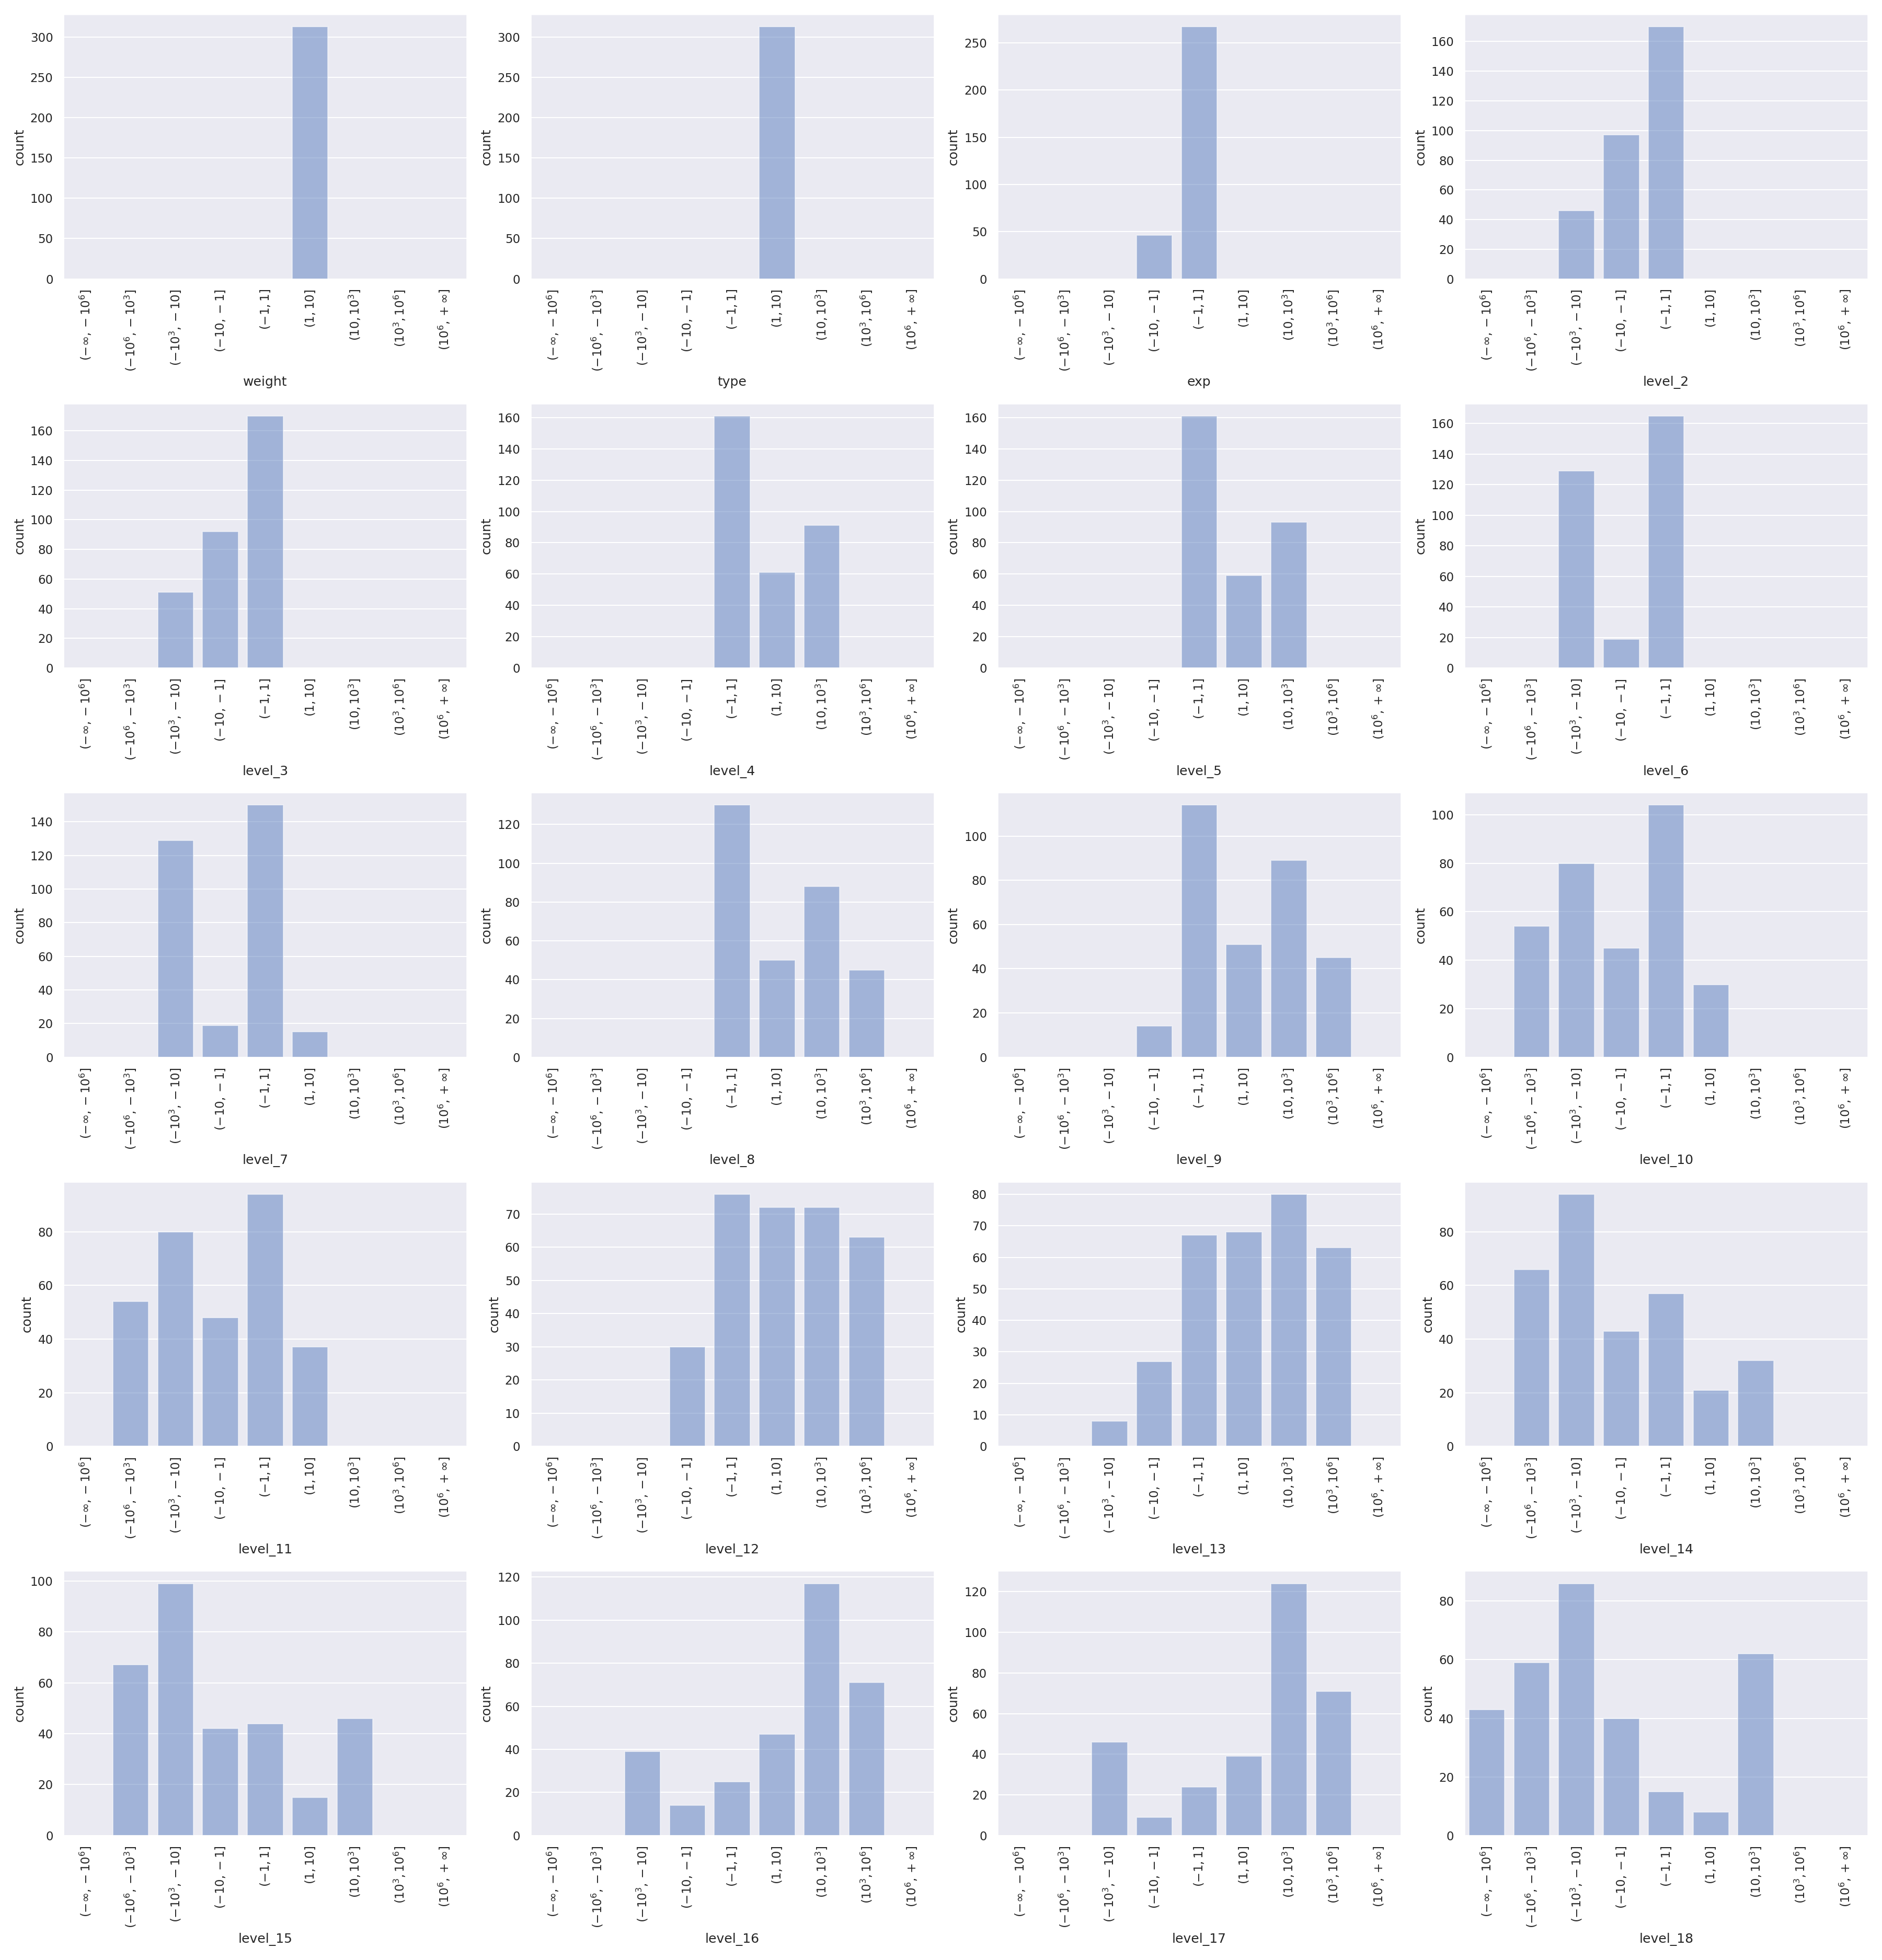

In [22]:
from IPython.display import Image
Image('./img/{}.png'.format(OUTPUT), width=480)

Differently from the low weight case, variables are not $\mathcal{O}(1)$ and have in fact much more variability:

In [23]:
df_high.drop(columns=['solutions', 'init']).apply([np.mean, np.var])

,weight,type,exp,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,level_10,level_11,level_12,level_13,level_14,level_15,level_16,level_17,level_18
mean,4.037276,4.0,0.501597,-4.213163,-4.658080,17.474616,18.476260,-79.983372,-83.638317,395.985348,410.928499,-1.726478e+03,-1.782014e+03,7.021491e+03,7.219883e+03,-2.652425e+04,-2.719587e+04,9.320024e+04,9.535027e+04,-3.062044e+05
var,5.126246,0.0,0.545671,35.154375,42.329733,907.208675,1016.694998,24661.041750,27094.985505,776110.779174,835512.646603,1.700621e+07,1.809668e+07,2.982230e+08,3.148385e+08,4.336862e+09,4.553048e+09,5.398017e+10,5.643713e+10,5.872270e+11


We can also try to visualise the boxplot of the variables but the results will not be as nice as in the previous case:

In [24]:
INPUT  = './data/sft-trunc_eda_high.csv'
OUTPUT = 'boxplot_high'

!python3 ./scripts/df-boxplot.py --input {INPUT} --output {OUTPUT}

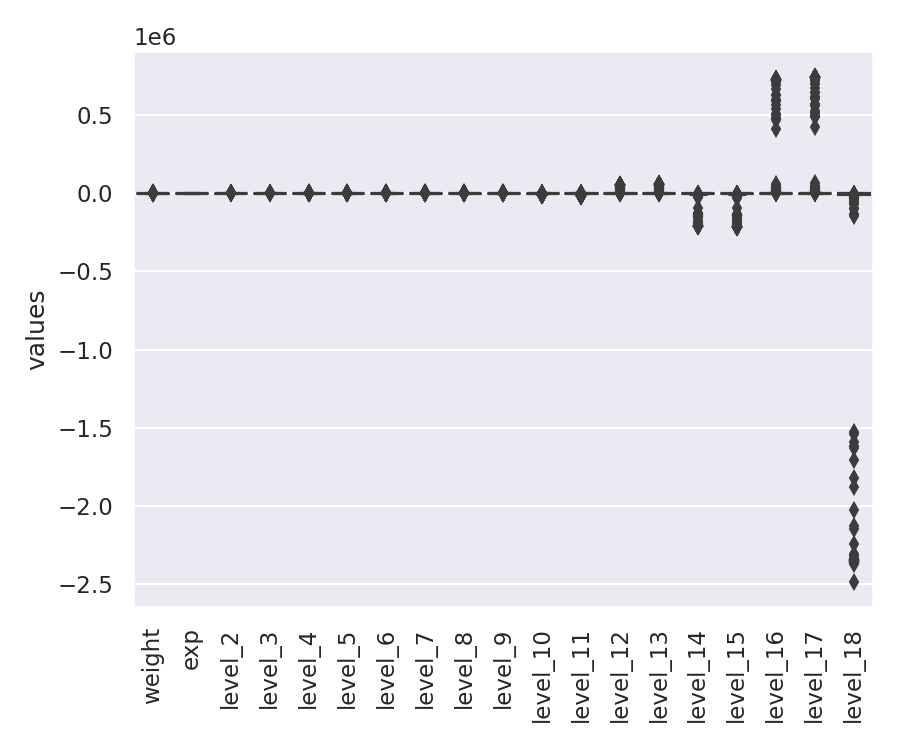

In [25]:
from IPython.display import Image
Image('./img/{}.png'.format(OUTPUT), width=480)

As we can see all variable have a large number of "very far" outliers which spoil the distribution.

One thing we immediately notice is that when `weight` $>1.5$ then the `type` of the observable is strictly $4$. In fact, we can try to study the properties of the observables (`weight` and `type`) in the two cases side-by-side after binarising the conformal weight:

In [26]:
df_bin = df[['weight', 'type']].copy()
df_bin['weight_bin'] = pd.Categorical((df_bin['weight'] < 1.5).astype(int)).\
                          rename_categories(['> 1.5', '< 1.5'])

# group by category
df_bin.groupby(['weight_bin', 'type']).agg({'weight': ['mean', 'var']})

weight          
                     mean       var
weight_bin type                    
> 1.5      2          NaN       NaN
           4     4.037276  5.126246
< 1.5      2     0.000000  0.000000
           4     0.575483  0.209877

We therefore learn that for higher weights the `type` of the observable is strictly $4$, while for lower weights `type` $=2$ implies `weight` $=0$.

As a last step in the exploratory data analysis we show the correlation matrix of the variables.
We show the complete version and with the separate distinction between high and low weights:

In [27]:
INPUT  = './data/sft-trunc_eda.csv'
OUTPUT = 'corr_mat_full'

!python3 ./scripts/df-corr-mat.py --input {INPUT} --output {OUTPUT}

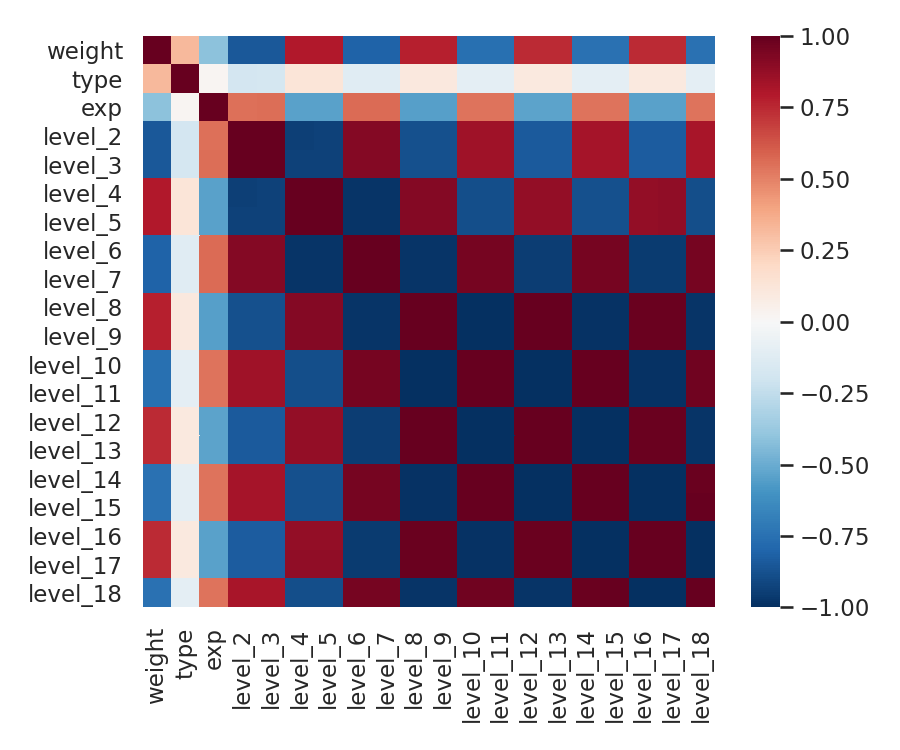

In [28]:
from IPython.display import Image
Image('./img/{}.png'.format(OUTPUT), width=480)

In [29]:
INPUT  = './data/sft-trunc_eda_low.csv'
OUTPUT = 'corr_mat_low'

!python3 ./scripts/df-corr-mat.py --input {INPUT} --output {OUTPUT}

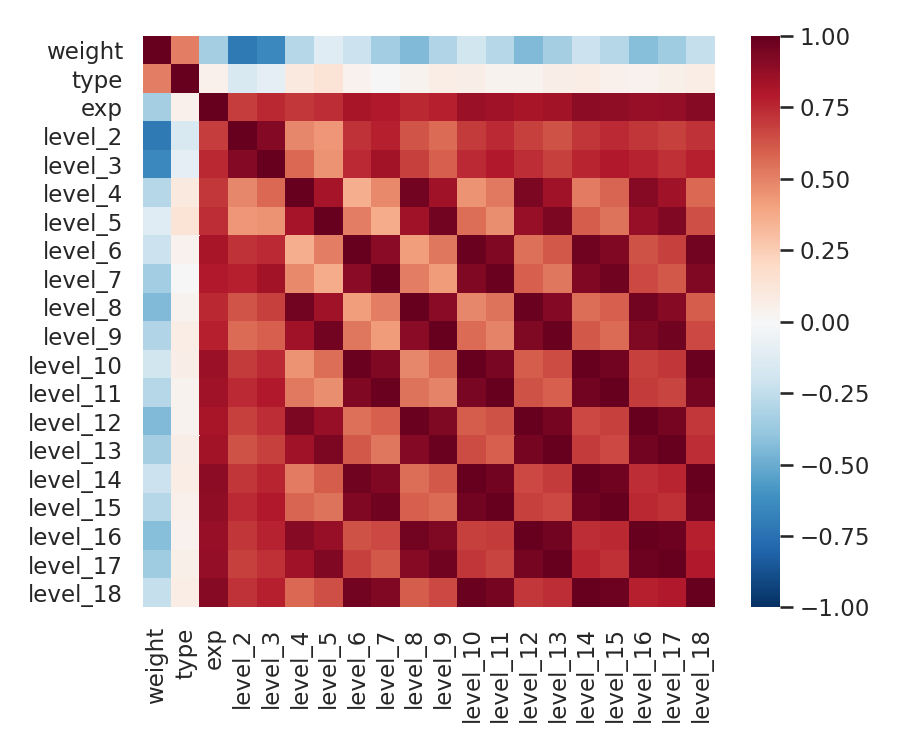

In [30]:
from IPython.display import Image
Image('./img/{}.png'.format(OUTPUT), width=480)

In [31]:
INPUT  = './data/sft-trunc_eda_high.csv'
OUTPUT = 'corr_mat_high'

!python3 ./scripts/df-corr-mat.py --input {INPUT} --output {OUTPUT}

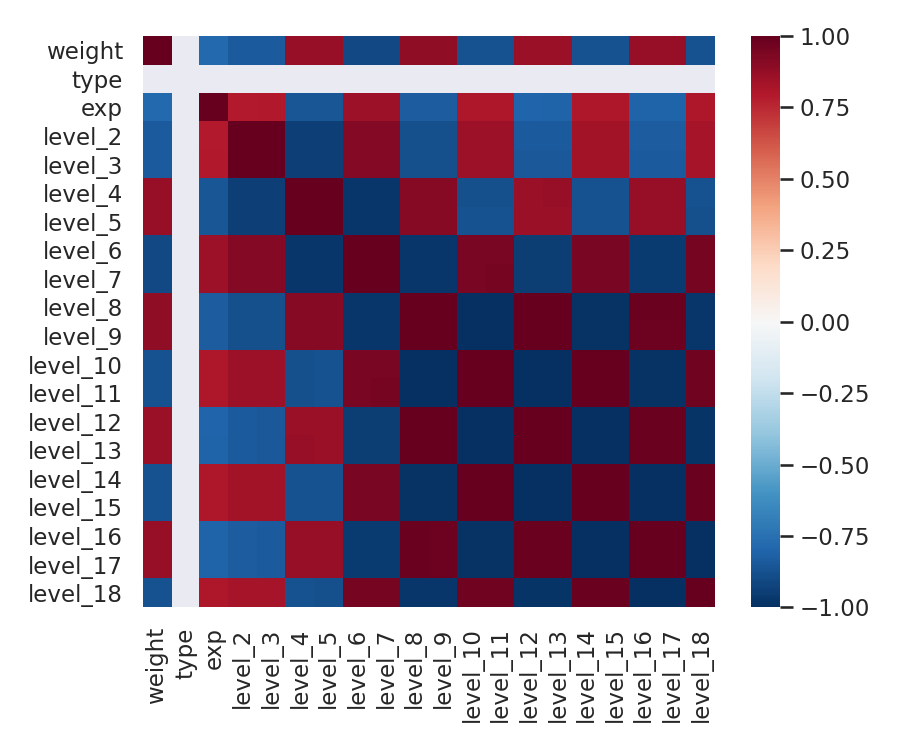

In [32]:
from IPython.display import Image
Image('./img/{}.png'.format(OUTPUT), width=480)

Using the divergent palette we can see that the `type` of the observable is mostly unrelated to the other variables, while the truncation levels are strongly correlated among themselves (especially the higher levels).